# **Basics of matplotlib and pandas wrapper**
Cada comando **pyplot** realiza un cambio en una figura inicialmente instanciada.
Cono *pyplot.figure()* se puede inicializar una nueva visualización,
aunque basta con llamar a un comando de ploteo para iniciarla
automáticamente.
En cambio, usando pyplot.show(), se cierra la figura sobre la que se estaba
operando, y se puede abrir una nueva
 
[Estilos de linea](https://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D.set_linestyle)  
[Sobre colores](https://matplotlib.org/api/colors_api.html)  
[Estilos de marcador](https://matplotlib.org/api/markers_api.html)  

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# gráficos dibujados directamente en el propio cuaderno, en lugar de tener
# los gráficos presentados en una ventana separada(defecto)
%matplotlib inline


## Curve plotting

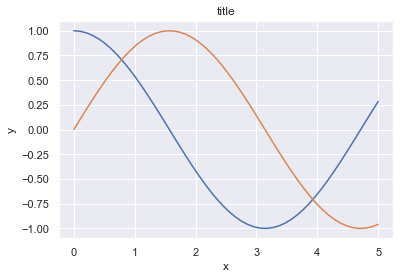

In [34]:
x = np.linspace(0, 5, 50)  # 50 números igualmente distanciados que van de 0 a 5
y_cos = np.cos(x)
y_sin = np.sin(x)


plt.figure()  # initialize a figure
# plot series of coordinates as a line
plt.plot(x, y_cos)
plt.plot(x, y_sin)

plt.xlabel('x')  # adds label to x axis
plt.ylabel('y')  # adds label to y axis
plt.title('title')  # adds a title
plt.show()  # close a figure


In [35]:
# modoficar el color por defecto que se le aplicara a cada plot() dentro de la figura
mpl.rcParams['axes.prop_cycle'] = mpl.cycler('color', ['purple', 'green',  'red', 'blue'])


## Using *subplot(nrows, ncols, plot_number)*

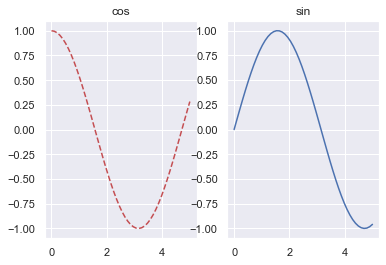

In [36]:
# defines 1 row, 2 column panel, activates figure 1
plt.subplot(1,2,1) 
plt.plot(x,y_cos,'r--') #  #se puede especificar el tipo de linea y el color (por defecto continua)
# adds a title
plt.title('cos')

# defines 1 row 2 column panel, activates figure 2
plt.subplot(1,2,2) 
plt.plot(x,y_sin,'b-')
plt.title('sin') 
plt.show()


## Plotting scatterplots for relationships in data
Los gráficos de dispersión representan dos variables como puntos en un
plano, y pueden ayudarle a averiguar la relación entre las dos variables.
También son muy eficaces para representar groups and clustering

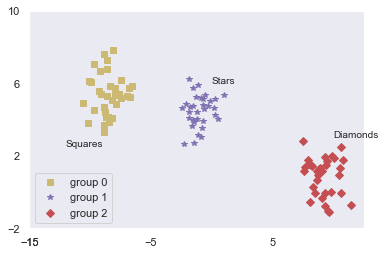

In [37]:
from sklearn.datasets import make_blobs
data, target = make_blobs(n_samples=100, n_features=2, centers=3, random_state=7)

plt.plot(data[target == 0, 0], data[target == 0, 1], 'ys', label='group 0')  # yellow square

plt.plot(data[target == 1, 0], data[target == 1, 1], 'm*', label='group 1')  # magenta stars

plt.plot(data[target == 2, 0], data[target == 2, 1], 'rD', label='group 2')  # red diamonds

plt.ylim(-2, 10)  # redefines the limits of y axis

plt.yticks([10, 6, 2, -2])  # redefines y axis ticks
plt.xticks([-15, -5, 5, -15])  # redefines x axis ticks

plt.annotate('Squares', (-12, 2.5))  # prints text at coordinates
plt.annotate('Stars', (0, 6))
plt.annotate('Diamonds', (10, 3))

# places a legend of labelled items
plt.legend(loc='lower left', numpoints=1)

plt.grid()  # adds a grid
plt.show()


## Histogramas
Los histogramas pueden representar eficazmente la distribución de una variable. Cambiar el número de intervalos, cambiará el modo en que se *discretizan* las distribuciones

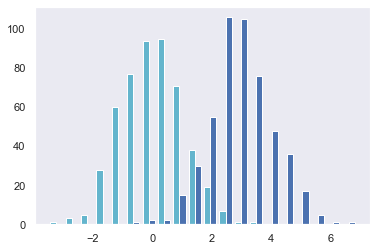

In [38]:

x = np.random.normal(loc=0.0, scale=1.0, size=500)
z = np.random.normal(loc=3.0, scale=1.0, size=500)
plt.hist(np.column_stack((x,z)), bins=20, histtype='bar', color = ['c','b'], stacked=False)

plt.grid()
plt.show()

## Gráficos de barras
útiles para comparar cantidades de diferentes categorías. Pueden utilizarse para presentar
diversos estadísticos de sus predictores y cómo se relacionan con la
variable objetivo

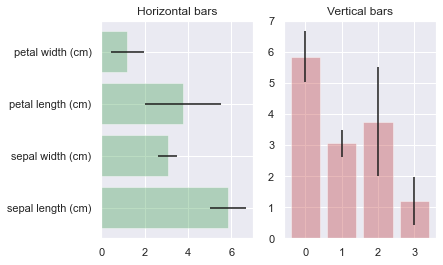

In [39]:
from sklearn.datasets import load_iris
iris = load_iris()
average = np.mean(iris.data, axis=0) 
std = np.std(iris.data, axis=0) 

range_ = range(np.shape(iris.data)[1]) 


plt.subplot(1,2,1) # defines 1 row, 2 columns panel, activates figure 1
plt.title('Horizontal bars')
plt.barh(range_,average, color="g", xerr=std, alpha=0.4, align="center")
plt.yticks(range_, iris.feature_names)

plt.subplot(1,2,2) # defines 1 row 2 column panel, activates figure 2
plt.title('Vertical bars')
plt.bar(range_,average, color="r", yerr=std, alpha=0.4, align="center")
plt.xticks(range_, range_)
plt.show()

## Image visualization

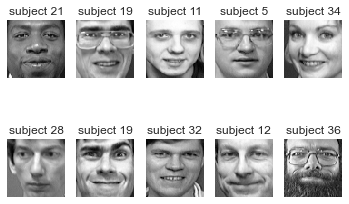

In [40]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt
dataset = fetch_olivetti_faces(shuffle=True, random_state=5)

for k in range(10):
    plt.subplot(2, 5, k+1)

    # remodelar los vectores para que se asemejen a una matriz de píxeles y ajustar
    # la interpolación a "nearest" ayuda a suavizar la imagen
    plt.imshow(dataset.data[k].reshape(64, 64), cmap=plt.cm.gray, interpolation='nearest')
    plt.title('subject '+str(dataset.target[k]))
    plt.axis('off')
plt.show()


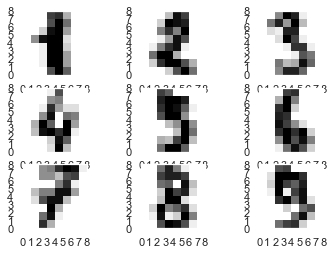

In [41]:
from sklearn.datasets import load_digits
digits = load_digits()
for number in range(1,10):
    fig = plt.subplot(3, 3, number)
    #  Extent defines the images max and min  of the horizontal and vertical values
    fig.imshow(digits.images[number],  cmap='binary',  interpolation='none',  extent=[0,8,0,8])
    fig.set_xticks(np.arange(0, 9, 1))
    fig.set_yticks(np.arange(0, 9, 1))
    fig.grid()
plt.show()

In [42]:
import pandas as pd
print ('Your pandas version is: %s' % pd.__version__)

Your pandas version is: 1.4.3


## **Usando las facilidades de *pandas* para visualizar**


El paquete *pandas* se basa en funciones de matplotlib para
sus visualizaciones que ofrece ventajas en términos de velocidad y
simplicidad, que son los valores fundamentales de cualquier proceso
**EDA**.

 En cambio, si su propósito es comunicar mejor los hallazgos mediante el
uso de una visualización hermosa, puede notar que no es tan fácil
personalizar las salidas gráficas de pandas. 


In [43]:
"""Utilizaremos el DataFrame iris_df para todos los ejemplos """
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
groups = list(iris.target)
iris_df['groups'] = pd.Series([iris.target_names[k] for k in groups])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),groups
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


###  Boxplots,density, histograms and scatterplots

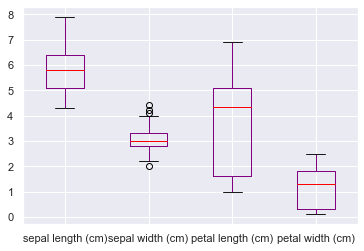

In [44]:
 boxplots = iris_df.boxplot(return_type='axes')

sepal length (cm)    AxesSubplot(0.1,0.15;0.8x0.75)
dtype: object

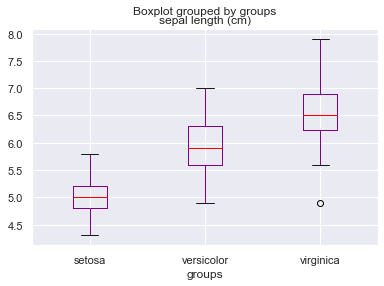

In [45]:
iris_df.boxplot(column='sepal length (cm)', by='groups', return_type='axes')


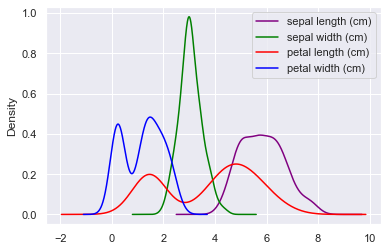

In [46]:
# prints the distributions for all the numeric variables of the dataset:
densityplot = iris_df.plot(kind='density')

<AxesSubplot:ylabel='Frequency'>

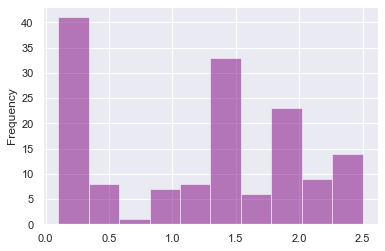

In [47]:
# the resulting distribution represented by a histogram:
iris_df['petal width (cm)'].plot(kind='hist',alpha=0.5)

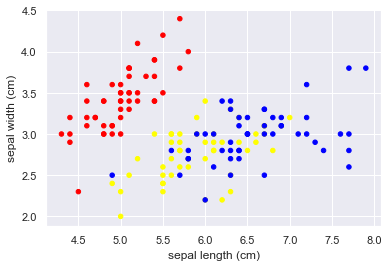

In [48]:
colors_palette = {0: 'red', 1: 'yellow', 2:'blue'}
colors = [colors_palette[c] for c in groups]
simple_scatterplot = iris_df.plot(kind='scatter', x=0, y=1, c=colors)

Si el número devariables no es muy elevado podemos dibujar automáticamente una 
matriz de gráficos de dispersión ( (using the kernel density estimation, *'kde'* en la diagonal):

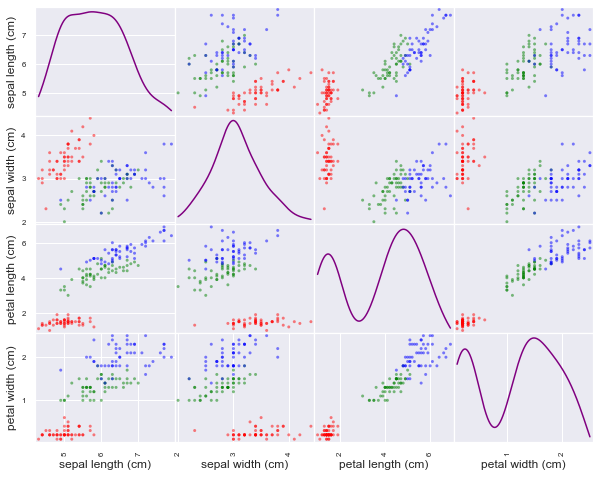

In [49]:
from pandas.plotting import scatter_matrix
colors_palette = {0: "red", 1: "green", 2: "blue"}
colors = [colors_palette[c] for c in groups]

matrix_of_scatterplots = scatter_matrix(iris_df,
                                        alpha=0.5,  # trasparencia 
                                        figsize=(10, 8),
                                        color=colors,
                                        diagonal='kde')


### Discovering patterns by parallel coordinates

Al trazar todas las observaciones como líneas paralelas con respecto a
todas las variables posibles (alineadas arbitrariamente en la abscisa), las
coordenadas paralelas le ayudarán a detectar si hay corrientes de
observaciones agrupadas como sus clases, y a comprender las variables
que mejor separan las corrientes (las variables predictoras más útiles).

Naturalmente, para que el gráfico tenga sentido, las características del
gráfico deben tener la misma escala (de lo contrario, normalícelas) 

<AxesSubplot:>

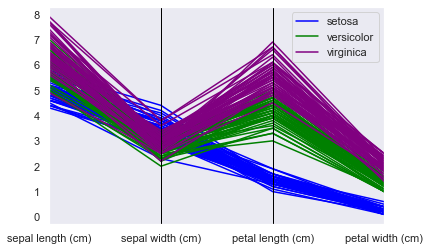

In [50]:
from pandas.plotting._matplotlib import parallel_coordinates
parallel_coordinates(iris_df,'groups',color=['blue','green', 'purple'])